In [1]:
import gym
import pickle
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO  # DDPG, SAC, TD3
from stable_baselines3.common.monitor import Monitor
from chameleon import Chameleon
from stable_baselines3.common.callbacks import (
    EvalCallback,
    BaseCallback,
    StopTrainingOnRewardThreshold,
)

In [2]:
# eval_env = Chameleon()

# callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=0, verbose=0)
# eval_callback = EvalCallback(
#     eval_env,
#     callback_on_new_best=callback_on_best,
#     best_model_save_path="./logs/",
#     log_path="./logs/",
#     eval_freq=1_000,
#     deterministic=True,
#     render=False,
#     verbose=1,
# )

In [3]:
monitor = True

In [51]:
env = Chameleon(rtol=0.05)
if monitor:
    env = Monitor(env, "logging")
model = PPO(
    "MlpPolicy",
    env,
    verbose=0,
)
model.learn(total_timesteps=int(6e5))

In [52]:
rews = np.loadtxt("logging.monitor.csv", delimiter=",", skiprows=2, usecols=(0,))

In [53]:
rews.shape

(111564,)

In [54]:
rews = rews[564:]

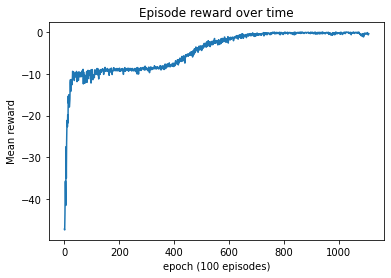

In [60]:
rews = rews.reshape((1110, 100))
means = rews.mean(axis=1)
plt.plot(means)
plt.title("Episode reward over time")
plt.xlabel("epoch (100 episodes)")
plt.ylabel("Mean reward")
plt.savefig("rewardvsepoch.png")
plt.show()

In [ ]:
# stdevs = rews.std(axis=1)
# plt.errorbar(x=np.arange(0, means.shape[0]),y=means, yerr=stdevs)

In [58]:
# pos_hist = []
# state = env.reset()
# # pos_hist.append(env.pos)
# done = False
# while not done:
#     pos_hist.append(env.pos)
#     action = model.predict(state, deterministic=True)[0]  # need to do deterministic for PPO
#     print(action)
#     state, rew, done, _ = env.step(action)
#     print(rew)

[0.77084917 1.        ]
-1
[-0.09857135  1.        ]
1


In [91]:
# for i in range(len(pos_hist)):
#     p = pos_hist[i]
#     plt.scatter(p , 0*p)
#     plt.scatter(env.env.target_pos, 0)
#     plt.scatter(env.env.pos_init[-1], 0)
#     plt.title(f"Tip position is {p[-1]}")
#     plt.xlim((0, 0.2))
#     plt.savefig(f"frame{i}.png")
#     plt.clf()

<Figure size 432x288 with 0 Axes>

In [63]:
# pos_hist.append(env.winning_pos)

In [64]:
# history = []
# for i in range(len(pos_hist)):
#     x_p = pos_hist[i]
#     y = np.zeros(env.n_elems)
#     ar = np.vstack((x_p, y)).T
#     history.append(ar)

# with open("winning_history.txt", "wb") as fp:
#     pickle.dump(history, fp)

In [ ]:
# model.save("one_million_ppo")

## max distance E = 1 agent can reach with the given torques is 0.21. How did i find that? By applying the max torque for each time step until the episode was over.

In [ ]:
# evals = np.load("./logs/evaluations.npz")
# evals.files